In [2]:
#Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from fredapi import Fred
import credentials
#Data used from Fred dataset which can be found: https://fred.stlouisfed.org/

api_key = credentials.api_key

pd.set_option('display.max_columns', 500)
#plt.style.use('seaborn-colorblind')
plt.style.use('ggplot')

In [4]:
# Fred Initialization

fred = Fred(api_key=api_key)


In [9]:
#Fred Search

sp_search = fred.search('S&P', order_by= 'popularity')

sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-07-22,2023-07-22,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-07-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-07-21 08:15:13-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-07-22,2023-07-22,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-06-27 08:13:02-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-07-22,2023-07-22,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-07-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-07-21 08:14:07-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-07-22,2023-07-22,S&P 500,2013-07-22,2023-07-21,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-07-21 19:10:59-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-07-22,2023-07-22,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,Household data are collected as of March. As ...


<AxesSubplot:title={'center':'S&P 500'}, xlabel='Date', ylabel='Price'>

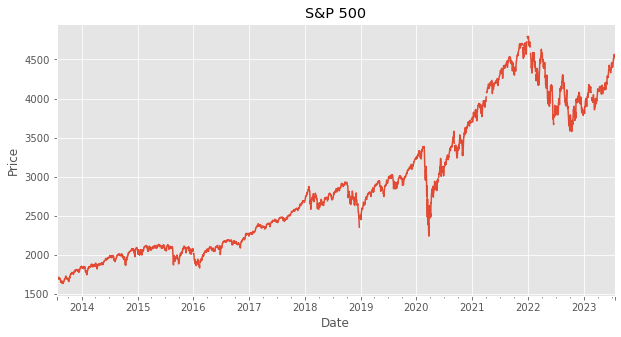

In [18]:
#Pull in some data from Fred and Plot it

sp500 = fred.get_series(series_id = 'SP500')

sp500.plot(figsize=(10,5), title='S&P 500', xlabel= 'Date', ylabel = 'Price')

In [29]:
# Pull and Join Multiple Series

unemployment_info = fred.search('unemployment')
unemployment_info.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-07-22,2023-07-22,Unemployment Rate,1948-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-07 07:45:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-07-22,2023-07-22,Unemployment Rate,1948-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-07-07 07:45:14-05:00,53,The unemployment rate represents the number of...
CCSA,CCSA,2023-07-22,2023-07-22,Continued Claims (Insured Unemployment),1967-01-07,2023-07-08,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-07-20 07:33:03-05:00,76,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2023-07-22,2023-07-22,Continued Claims (Insured Unemployment),1967-01-07,2023-07-08,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-07-20 07:33:03-05:00,41,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2023-07-22,2023-07-22,Unemployment Level,1948-01-01,2023-06-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-07-07 07:45:05-05:00,67,The series comes from the 'Current Population ...


In [34]:
unemployment_rate_adjusted = fred.get_series('UNRATE')
unemployment_rate_adjusted

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-02-01    3.6
2023-03-01    3.5
2023-04-01    3.4
2023-05-01    3.7
2023-06-01    3.6
Length: 906, dtype: float64

<AxesSubplot:>

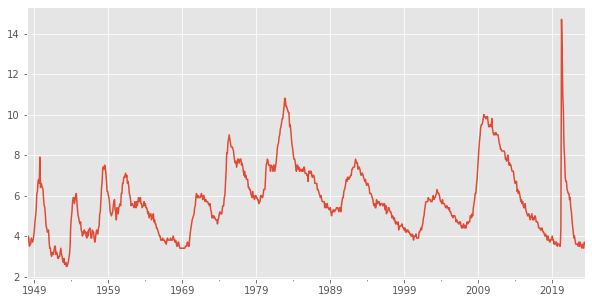

In [38]:
unemployment_rate_adjusted.plot(figsize=(10,5))

In [44]:
unemployment_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemployment_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-07-22,2023-07-22,Unemployment Rate,1948-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-07 07:45:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-07-22,2023-07-22,Unemployment Rate,1948-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-07-07 07:45:14-05:00,53,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-07-22,2023-07-22,Unemployment Rate - Black or African American,1972-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-07 07:45:08-05:00,67,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2023-07-22,2023-07-22,Unemployment Level,1948-01-01,2023-06-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-07-07 07:45:05-05:00,67,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2023-07-22,2023-07-22,Unemployment Rate - Black or African American,1972-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-07-07 07:45:32-05:00,19,The series comes from the 'Current Population ...


In [49]:
filtered_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
filtered_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-07-22,2023-07-22,Unemployment Rate,1948-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-07 07:45:02-05:00,93,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-07-22,2023-07-22,Unemployment Rate - Black or African American,1972-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-07 07:45:08-05:00,67,The series comes from the 'Current Population ...
U6RATE,U6RATE,2023-07-22,2023-07-22,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-07 07:45:12-05:00,65,The series comes from the 'Current Population ...
CAUR,CAUR,2023-07-22,2023-07-22,Unemployment Rate in California,1976-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-20 14:30:02-05:00,59,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-07-22,2023-07-22,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,50,Series Is Presented Here As Three Variables--(...


In [74]:
#Filter out all results not including Unemployment rate
unemployment_rate_by_location = filtered_df.loc[filtered_df['title'].str.contains('Unemployment Rate')]
# Fred denotes states rates by their state Abbreviation + 'UR', this picks out only the values in that format
unemployment_rate_by_location = unemployment_rate_by_location.loc[unemployment_rate_by_location['id'].str.len()==4]

In [76]:
unemployment_rate_by_location.index

Index(['CAUR', 'FLUR', 'TXUR', 'NYUR', 'OHUR', 'ALUR', 'MIUR', 'PAUR', 'NCUR',
       'MNUR', 'NJUR', 'MAUR', 'COUR', 'ORUR', 'GAUR', 'WIUR', 'ILUR', 'TNUR',
       'SCUR', 'WVUR', 'KYUR', 'VAUR', 'AZUR', 'LAUR', 'OKUR', 'NMUR', 'ARUR',
       'MOUR', 'CTUR', 'WAUR', 'INUR', 'AKUR', 'MDUR', 'UTUR', 'PRUR', 'IAUR',
       'NVUR', 'MSUR', 'HIUR', 'NDUR', 'DCUR', 'NEUR', 'KSUR', 'SDUR', 'DEUR',
       'RIUR', 'MTUR', 'NHUR', 'MEUR', 'WYUR', 'IDUR', 'VTUR'],
      dtype='object', name='series id')

In [77]:
state_results = []

for fred_id in unemployment_rate_by_location.index:
    result = fred.get_series(fred_id)
    result = result.to_frame(name = fred_id)
    state_results.append(result)

In [80]:
state_results

[            CAUR
 1976-01-01   9.2
 1976-02-01   9.2
 1976-03-01   9.1
 1976-04-01   9.1
 1976-05-01   9.0
 ...          ...
 2023-01-01   4.2
 2023-02-01   4.4
 2023-03-01   4.4
 2023-04-01   4.5
 2023-05-01   4.5
 
 [569 rows x 1 columns],
             FLUR
 1976-01-01   9.7
 1976-02-01   9.7
 1976-03-01   9.6
 1976-04-01   9.5
 1976-05-01   9.3
 ...          ...
 2023-01-01   2.6
 2023-02-01   2.6
 2023-03-01   2.6
 2023-04-01   2.6
 2023-05-01   2.6
 
 [569 rows x 1 columns],
             TXUR
 1976-01-01   5.8
 1976-02-01   5.8
 1976-03-01   5.9
 1976-04-01   5.9
 1976-05-01   5.9
 ...          ...
 2023-01-01   3.9
 2023-02-01   4.0
 2023-03-01   4.0
 2023-04-01   4.0
 2023-05-01   4.1
 
 [569 rows x 1 columns],
             NYUR
 1976-01-01  10.3
 1976-02-01  10.3
 1976-03-01  10.2
 1976-04-01  10.2
 1976-05-01  10.1
 ...          ...
 2023-01-01   4.2
 2023-02-01   4.2
 2023-03-01   4.1
 2023-04-01   4.0
 2023-05-01   3.9
 
 [569 rows x 1 columns],
             OHUR
 1976-01-0